# Kamień milowy 2(Inżynieria cech, wstępne modelowanie)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
congressional_voting_df = pd.read_csv("congressional_voting_dataset.csv")

In [3]:
map = {"y": 1, "n" : 0, "?": np.nan, "democrat" : 1, "republican" : 0}

columns = congressional_voting_df.columns.to_list()
for column in columns:
    congressional_voting_df[column] = congressional_voting_df[column].map(map)

congressional_voting_df.head(5)

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa,political_party
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN,0.0
2,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0


In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(congressional_voting_df.drop("political_party", axis=1), 
                                                    congressional_voting_df["political_party"], 
                                                    test_size=0.3, shuffle=True, random_state=42)

In [58]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imp.fit(X_train)

X_train = pd.DataFrame(imp.transform(X_train), columns = X_train.columns.to_list())
X_test = pd.DataFrame(imp.transform(X_test), columns = X_test.columns.to_list())

In [59]:
X_train

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
300,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
301,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
302,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


## Modelowanie

### Decision tree

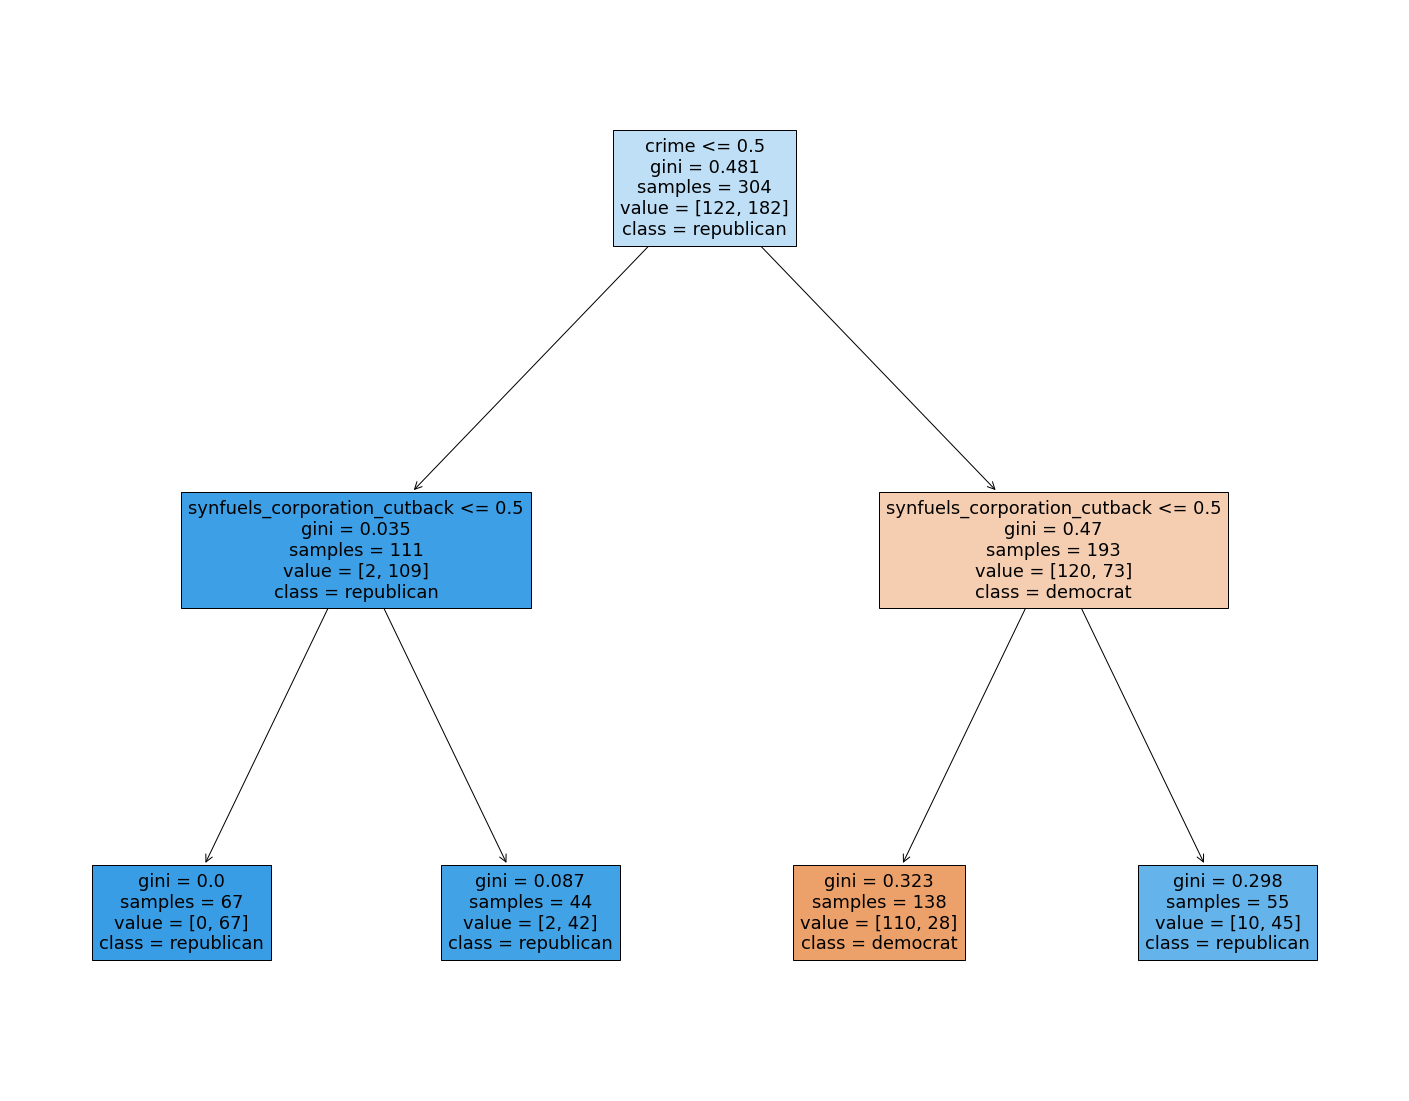

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(random_state=1234, max_depth=2)
X = X_train[["crime", "water_project_cost_sharing", "synfuels_corporation_cutback"]]
model = dtc.fit(X, y_train)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc, 
                   feature_names=X.columns.to_list(),  
                   class_names=["democrat", "republican"],
                   filled=True)

In [83]:
X = X_test[["crime", "water_project_cost_sharing", "synfuels_corporation_cutback"]]
dtc.score(X, y_test)

0.8244274809160306

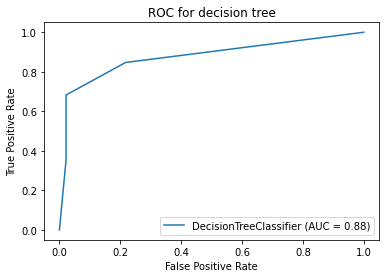

In [84]:
from sklearn import metrics

metrics.plot_roc_curve(dtc, X, y_test)
plt.title("ROC for decision tree")
plt.show()

### Logistic regression

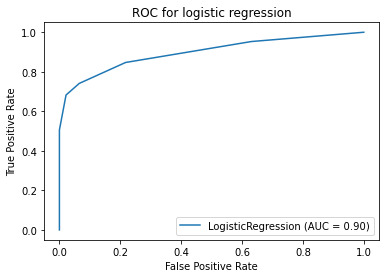

In [63]:
from sklearn.linear_model import LogisticRegression

X = X_train[["crime", "water_project_cost_sharing", "synfuels_corporation_cutback"]]
lg = LogisticRegression(random_state=0)
lg.fit(X, y_train)

X = X_test[["crime", "water_project_cost_sharing", "synfuels_corporation_cutback"]]
metrics.plot_roc_curve(lg, X, y_test)
plt.title("ROC for logistic regression")
plt.show()

In [64]:
lg.score(X, y_test)

0.8244274809160306

### Random forest

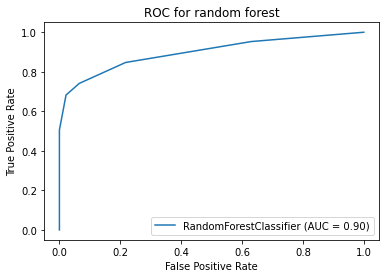

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train[["crime", "water_project_cost_sharing", "synfuels_corporation_cutback"]], y_train)

X = X_test[["crime", "water_project_cost_sharing", "synfuels_corporation_cutback"]]
metrics.plot_roc_curve(rfc, X, y_test)
plt.title("ROC for random forest")
plt.show()

In [37]:
rfc.score(X, y_test)

0.8244274809160306

### Adaboost

In [80]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=100, random_state=0)
X = X_train[["crime", "water_project_cost_sharing", "synfuels_corporation_cutback"]]
abc.fit(X, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [71]:
abc.score(X_test[["crime", "water_project_cost_sharing", "synfuels_corporation_cutback"]], y_test)

0.8244274809160306

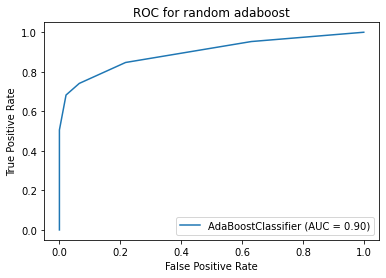

In [81]:
X = X_test[["crime", "water_project_cost_sharing", "synfuels_corporation_cutback"]]
metrics.plot_roc_curve(abc, X, y_test)
plt.title("ROC for random adaboost")
plt.show()

### Podsumowanie(cross-validation)

In [85]:
from sklearn.model_selection import cross_val_score

scores_dtc = cross_val_score(dtc, X_train[["crime", "water_project_cost_sharing", "synfuels_corporation_cutback"]], y_train, cv=5)
scores_dtc

array([0.81967213, 0.86885246, 0.90163934, 0.85245902, 0.9       ])

In [74]:
scores_lg = cross_val_score(lg, X_train[["crime", "water_project_cost_sharing", "synfuels_corporation_cutback"]], y_train, cv=5)
scores_lg

array([0.81967213, 0.86885246, 0.90163934, 0.85245902, 0.9       ])

In [78]:
abc = AdaBoostClassifier(n_estimators=100, random_state=0)
scores_abc = cross_val_score(abc, X_train[["crime", "water_project_cost_sharing", "synfuels_corporation_cutback"]], y_train, cv=5)
scores_abc
# bardzo dziwne, że wszystkie klasyfikatory dają takie same wyniki

array([0.81967213, 0.86885246, 0.90163934, 0.85245902, 0.9       ])